IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

IMPORTING THE DATASET

In [2]:
dataset = pd.read_csv("heart.csv")
print(dataset)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

EXTRACTING X AND Y

In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(X)
print(y)

[[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


STANDARDIZING THE DATSET

In [4]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

SPLITTING THE DATSET INTO TRAINING DATA AND TESTING DATA

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

APPLYING THE PCA

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [7]:
print(explained_variance.reshape(len(explained_variance),1))

[[0.20556073]
 [0.12694064]]


In [8]:
print(X_train)

[[-1.89329766 -0.66846763]
 [ 1.72864546 -0.04293299]
 [ 0.18065593 -0.55449282]
 [-0.41371972  1.09574315]
 [ 1.26671161 -0.71362263]
 [-0.77208684  1.58815406]
 [-0.20826269  1.85061786]
 [-0.12463217  1.64268742]
 [-1.01088411  1.34875815]
 [-2.37881724 -0.89129695]
 [-1.91017698 -0.99319423]
 [ 1.08394773  0.64973952]
 [-1.84547576 -0.67578032]
 [ 1.34943673  0.67683308]
 [-1.25965698 -0.12729618]
 [-0.85952603  0.76576645]
 [ 0.24282545  0.57614519]
 [ 0.91911043  0.36492564]
 [ 1.00362178 -0.78880972]
 [-1.67352341 -1.1182693 ]
 [ 2.00472272 -0.73442842]
 [-0.4053779  -0.29254835]
 [ 0.04892073 -1.78870822]
 [-1.46036353 -2.13098978]
 [ 2.0883956   1.36093829]
 [ 3.63479146 -0.98417731]
 [-0.31239823  1.86482355]
 [-0.18967294  0.41418047]
 [ 0.4675128  -1.03919649]
 [ 0.50898086  0.95742776]
 [-3.27418129 -1.08756935]
 [-3.14052982 -1.3616148 ]
 [-1.07525118 -0.05296289]
 [-0.66328179 -0.39933129]
 [-1.67352341 -1.1182693 ]
 [-0.02143972  0.0344516 ]
 [ 0.09153378 -0.73826017]
 

TRAINING THE KNN MODEL ON DATASET

In [9]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

PREDICTING THE TEST RESULTS

In [10]:
y_pred = classifier.predict(X_test)
print(y_pred)


[0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0]


MAKING THE CONFUSION MATRIX

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[24  5]
 [ 4 28]]


0.8524590163934426

VISUALIZING THE TRAINING RESULTS

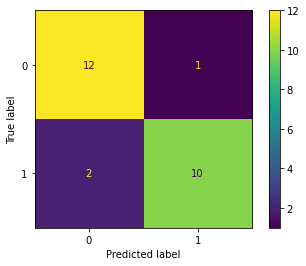

In [12]:
import matplotlib.pyplot as plt  # doctest: +SKIP
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
X, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(clf, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

HISTOGRAMS

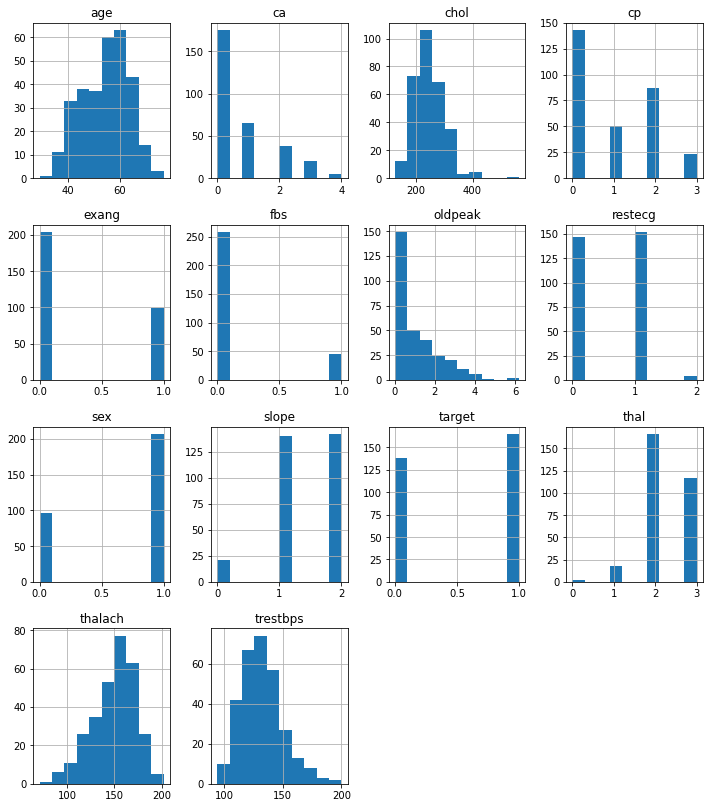

In [14]:
dataset.hist(figsize=(12,14));
plt.show()